In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

['Malgun Gothic']


# 거리 데이터 merge

In [50]:
subway = pd.read_csv('C:/Users/1102j/anaconda/dataScience/project/아파트(전월세)_노원구_with_역거리.csv', thousands=',')
subway.head(5)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
0,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202001,6,1000,65,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
1,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202007,9,1000,65,5,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
2,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,6,1000,65,10,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
3,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,21,13000,10,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
4,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202009,7,2000,60,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구


In [51]:
hos_park = pd.read_excel('C:/Users/1102j/anaconda/dataScience/project/노원구_병원_공원_상업문화시설.xlsx', thousands=',')
hos_park.head(5)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적...,계약년월,계약일,보증금.만원.,월세.만원.,층,건축년도,도로명,위도,경도,병원,공원,상업문화시설
0,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.0,202001,6,1000,65,4,2019,화랑로 425-7,37.617803,127.074563,1.420278,0.821341,1.50075
1,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.0,202007,9,1000,65,5,2019,화랑로 425-7,37.617803,127.074563,1.420278,0.821341,1.50075
2,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.0,202008,6,1000,65,10,2019,화랑로 425-7,37.617803,127.074563,1.420278,0.821341,1.50075
3,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.0,202008,21,13000,10,8,2019,화랑로 425-7,37.617803,127.074563,1.420278,0.821341,1.50075
4,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.0,202009,7,2000,60,8,2019,화랑로 425-7,37.617803,127.074563,1.420278,0.821341,1.50075


In [52]:
school = pd.read_csv('C:/Users/1102j/anaconda/dataScience/project/초등학교_거리.csv', thousands=',')
school.head(5)

,본번,부번,단지명,전월세구분,전용면적...,계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,초등학교,거리
0,683,30,(683-30),월세,20.0,202001,6,1000,65,4,2019,화랑로 425-7,37.617803,127.074563,서울공릉초등학교,0.090545
1,683,30,(683-30),월세,20.0,202007,9,1000,65,5,2019,화랑로 425-7,37.617803,127.074563,서울공릉초등학교,0.090545
2,683,30,(683-30),월세,20.0,202008,6,1000,65,10,2019,화랑로 425-7,37.617803,127.074563,서울공릉초등학교,0.090545
3,683,30,(683-30),월세,20.0,202008,21,13000,10,8,2019,화랑로 425-7,37.617803,127.074563,서울공릉초등학교,0.090545
4,683,30,(683-30),월세,20.0,202009,7,2000,60,8,2019,화랑로 425-7,37.617803,127.074563,서울공릉초등학교,0.090545


In [53]:
culture = pd.read_csv('C:/Users/1102j/anaconda/dataScience/project/문화시설.csv', thousands=',')
culture.head(5)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,대형마트,백화점,영화관
0,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.0,202001,6,1000,65,4,2019,화랑로 425-7,37.617803,127.074563,1.49,4.33,2.53
1,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.0,202007,9,1000,65,5,2019,화랑로 425-7,37.617803,127.074563,1.49,4.33,2.53
2,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.0,202008,6,1000,65,10,2019,화랑로 425-7,37.617803,127.074563,1.49,4.33,2.53
3,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.0,202008,21,13000,10,8,2019,화랑로 425-7,37.617803,127.074563,1.49,4.33,2.53
4,서울특별시 노원구 공릉동,683-30,683,30,(683-30),월세,20.0,202009,7,2000,60,8,2019,화랑로 425-7,37.617803,127.074563,1.49,4.33,2.53


In [54]:
print(len(subway), len(hos_park), len(school), len(culture))

14540 14780 14780 14780


In [14]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14540 entries, 0 to 14539
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      14540 non-null  object 
 1   번지       14540 non-null  object 
 2   본번       14540 non-null  float64
 3   부번       14540 non-null  float64
 4   단지명      14540 non-null  object 
 5   전월세구분    14540 non-null  object 
 6   전용면적(㎡)  14540 non-null  float64
 7   계약년월     14540 non-null  int64  
 8   계약일      14540 non-null  int64  
 9   보증금(만원)  14540 non-null  int64  
 10  월세(만원)   14540 non-null  int64  
 11  층        14540 non-null  int64  
 12  건축년도     14540 non-null  int64  
 13  도로명      14540 non-null  object 
 14  위도       14540 non-null  float64
 15  경도       14540 non-null  float64
 16  역거리(m)   14540 non-null  float64
 17  역이름      14540 non-null  object 
dtypes: float64(6), int64(6), object(6)
memory usage: 2.0+ MB


In [15]:
hos_park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      14780 non-null  object 
 1   번지       14780 non-null  object 
 2   본번       14780 non-null  int64  
 3   부번       14780 non-null  int64  
 4   단지명      14780 non-null  object 
 5   전월세구분    14780 non-null  object 
 6   전용면적...  14780 non-null  float64
 7   계약년월     14780 non-null  int64  
 8   계약일      14780 non-null  int64  
 9   보증금.만원.  14780 non-null  int64  
 10  월세.만원.   14780 non-null  int64  
 11  층        14780 non-null  int64  
 12  건축년도     14780 non-null  int64  
 13  도로명      14779 non-null  object 
 14  위도       14540 non-null  float64
 15  경도       14540 non-null  float64
 16  병원       14540 non-null  float64
 17  공원       14540 non-null  float64
 18  상업문화시설   14540 non-null  float64
dtypes: float64(6), int64(8), object(5)
memory usage: 2.1+ MB


In [16]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   본번       14780 non-null  int64  
 1   부번       14780 non-null  int64  
 2   단지명      14780 non-null  object 
 3   전월세구분    14780 non-null  object 
 4   전용면적...  14780 non-null  float64
 5   계약년월     14780 non-null  int64  
 6   계약일      14780 non-null  int64  
 7   보증금(만원)  14780 non-null  int64  
 8   월세(만원)   14780 non-null  int64  
 9   층        14780 non-null  int64  
 10  건축년도     14780 non-null  int64  
 11  도로명      14780 non-null  object 
 12  위도       14540 non-null  float64
 13  경도       14540 non-null  float64
 14  초등학교     14540 non-null  object 
 15  거리       14540 non-null  float64
dtypes: float64(4), int64(8), object(4)
memory usage: 1.8+ MB


In [17]:
culture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      14780 non-null  object 
 1   번지       14780 non-null  object 
 2   본번       14780 non-null  int64  
 3   부번       14780 non-null  int64  
 4   단지명      14780 non-null  object 
 5   전월세구분    14780 non-null  object 
 6   전용면적(㎡)  14780 non-null  float64
 7   계약년월     14780 non-null  int64  
 8   계약일      14780 non-null  int64  
 9   보증금(만원)  14780 non-null  int64  
 10  월세(만원)   14780 non-null  int64  
 11  층        14780 non-null  int64  
 12  건축년도     14780 non-null  int64  
 13  도로명      14780 non-null  object 
 14  위도       14540 non-null  float64
 15  경도       14540 non-null  float64
 16  대형마트     14780 non-null  float64
 17  백화점      14780 non-null  float64
 18  영화관      14780 non-null  float64
dtypes: float64(6), int64(8), object(5)
memory usage: 2.1+ MB


In [55]:
subway = subway.dropna()
hos_park = hos_park.dropna()
school = school.dropna()
culture = culture.dropna()

print(len(subway), len(hos_park), len(school), len(culture))

14540 14540 14540 14540


In [56]:
df = subway
df.head(3)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
0,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202001,6,1000,65,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
1,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202007,9,1000,65,5,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
2,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,6,1000,65,10,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구


In [57]:
df['병원'] = hos_park['병원']
df['공원'] = hos_park['공원']

df.head(5)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름,병원,공원
0,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202001,6,1000,65,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341
1,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202007,9,1000,65,5,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341
2,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,6,1000,65,10,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341
3,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,21,13000,10,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341
4,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202009,7,2000,60,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341


In [58]:
df['초등학교'] = school['거리']
df.head(5)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),...,층,건축년도,도로명,위도,경도,역거리(m),역이름,병원,공원,초등학교
0,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202001,6,1000,...,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341,0.090545
1,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202007,9,1000,...,5,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341,0.090545
2,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,6,1000,...,10,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341,0.090545
3,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,21,13000,...,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341,0.090545
4,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202009,7,2000,...,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341,0.090545


In [59]:
df['대형마트'] = culture['대형마트']
df['백화점'] = culture['백화점']
df['영화관'] = culture['영화관']

df.head(3)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),...,위도,경도,역거리(m),역이름,병원,공원,초등학교,대형마트,백화점,영화관
0,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202001,6,1000,...,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341,0.090545,1.49,4.33,2.53
1,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202007,9,1000,...,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341,0.090545,1.49,4.33,2.53
2,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,6,1000,...,37.617803,127.074563,34.287113,태릉입구,1.420278,0.821341,0.090545,1.49,4.33,2.53


In [37]:
apt_info = pd.read_excel('C:/Users/1102j/anaconda/dataScience/project/20210302_단지_기본정보.xls', thousands=',')
apt_info.head(5)

,시도,시군구,읍면,동리,단지코드,단지명,단지분류,법정동주소,도로명주소,분양형태,...,승강기(기타),총주차대수,지상주차대수,지하주차대수,CCTV대수,"주차관제, 홈네트워크",관리사무소 주소,관리사무소 연락처,관리사무소 팩스,부대복리시설
0,서울특별시,서대문구,NaN,홍제동,A12009201,홍제성원아파트,아파트,서울특별시 서대문구 홍제동 456 홍제성원아파트,서울특별시 서대문구 모래내로 430,분양,...,0.0,248.0,24.0,224.0,32.0,무,서울 서대문구 홍제동 456번지,027200959,027230959,"관리사무소, 노인정, 문고, 어린이놀이터, 휴게시설"
1,서울특별시,서대문구,NaN,홍제동,A12009202,홍제삼성래미안,아파트,서울특별시 서대문구 홍제동 461 홍제삼성래미안,서울특별시 서대문구 통일로 319,분양,...,0.0,519.0,71.0,448.0,80.0,무,서울시 서대문구 통일로 319 홍제삼성래미안 아파트 관리실,027301248,0263511248,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 휴게시설, 자전거보관소"
2,서울특별시,서대문구,NaN,홍제동,A12009203,홍제무악청구1차,아파트,서울특별시 서대문구 홍제동 453 홍제무악청구1차,서울특별시 서대문구 통일로 348,분양,...,0.0,778.0,402.0,376.0,127.0,무,서울시 서대문구 통일로 348 무악청구1차아파트,023790269,023916975,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤니티공간, 자전거보관소"
3,서울특별시,서대문구,NaN,홍제동,A12009302,인왕산벽산아파트,아파트,서울특별시 서대문구 홍제동 465 인왕산벽산아파트,서울특별시 서대문구 세무서길 106-12,분양,...,0.0,264.0,91.0,173.0,48.0,무,서대문구 세무서길 106-12,023918905,0263837769,"관리사무소, 노인정, 어린이놀이터, 자전거보관소"
4,서울특별시,서대문구,NaN,홍제동,A12009303,홍제현대그린,아파트,서울특별시 서대문구 홍제동 455 홍제현대그린,서울특별시 서대문구 세무서2길 64,분양,...,0.0,152.0,81.0,71.0,23.0,무,서울시 서대문구 세무서2길 64,023951135,023951138,"관리사무소, 노인정, 어린이놀이터, 자전거보관소"


In [38]:
len(apt_info)

18070

In [44]:
apt_info = apt_info.query('시도 == "서울특별시"')
print(apt_info.shape)
apt_info.head(3)

(2799, 52)


,시도,시군구,읍면,동리,단지코드,단지명,단지분류,법정동주소,도로명주소,분양형태,...,승강기(기타),총주차대수,지상주차대수,지하주차대수,CCTV대수,"주차관제, 홈네트워크",관리사무소 주소,관리사무소 연락처,관리사무소 팩스,부대복리시설
0,서울특별시,서대문구,NaN,홍제동,A12009201,홍제성원아파트,아파트,서울특별시 서대문구 홍제동 456 홍제성원아파트,서울특별시 서대문구 모래내로 430,분양,...,0.0,248.0,24.0,224.0,32.0,무,서울 서대문구 홍제동 456번지,027200959,027230959,"관리사무소, 노인정, 문고, 어린이놀이터, 휴게시설"
1,서울특별시,서대문구,NaN,홍제동,A12009202,홍제삼성래미안,아파트,서울특별시 서대문구 홍제동 461 홍제삼성래미안,서울특별시 서대문구 통일로 319,분양,...,0.0,519.0,71.0,448.0,80.0,무,서울시 서대문구 통일로 319 홍제삼성래미안 아파트 관리실,027301248,0263511248,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 휴게시설, 자전거보관소"
2,서울특별시,서대문구,NaN,홍제동,A12009203,홍제무악청구1차,아파트,서울특별시 서대문구 홍제동 453 홍제무악청구1차,서울특별시 서대문구 통일로 348,분양,...,0.0,778.0,402.0,376.0,127.0,무,서울시 서대문구 통일로 348 무악청구1차아파트,023790269,023916975,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 휴게시설, 커뮤니티공간, 자전거보관소"


In [46]:
apt_info = apt_info.query('시군구 == "노원구"')
print(apt_info.shape)
apt_info.head(3)

(212, 52)


,시도,시군구,읍면,동리,단지코드,단지명,단지분류,법정동주소,도로명주소,분양형태,...,승강기(기타),총주차대수,지상주차대수,지하주차대수,CCTV대수,"주차관제, 홈네트워크",관리사무소 주소,관리사무소 연락처,관리사무소 팩스,부대복리시설
997,서울특별시,노원구,NaN,상계동,A13920207,상계1차중앙하이츠,아파트,서울특별시 노원구 상계동 1279 상계1차중앙하이츠,서울특별시 노원구 노원로28길 15,분양,...,0.0,460.0,216.0,244.0,48.0,무,서울시 노원구 노원로 28길 15,029511619,0263161619,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 자전거보관소"
998,서울특별시,노원구,NaN,상계동,A13920209,상계중앙하이츠2차,아파트,서울특별시 노원구 상계동 1282 상계중앙하이츠2차,서울특별시 노원구 노원로 428,분양,...,0.0,882.0,147.0,735.0,102.0,무,노원구 노원로428,029308339,0262238339,"관리사무소, 노인정, 보육시설, 어린이놀이터, 자전거보관소"
999,서울특별시,노원구,NaN,상계동,A13920506,상계벽산,아파트,서울특별시 노원구 상계동 173-1 상계벽산,서울특별시 노원구 한글비석로 396,분양,...,0.0,583.0,328.0,255.0,145.0,무,서울특별시 노원구 한글비석로 396,029395543,0262253213,"관리사무소, 노인정, 어린이놀이터, 휴게시설, 자전거보관소"


In [67]:
df['도로명주소'] = df['시군구'].str[:9] + " " + df['도로명']
df.head(3)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),...,경도,역거리(m),역이름,병원,공원,초등학교,대형마트,백화점,영화관,도로명주소
0,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202001,6,1000,...,127.074563,34.287113,태릉입구,1.420278,0.821341,0.090545,1.49,4.33,2.53,서울특별시 노원구 화랑로 425-7
1,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202007,9,1000,...,127.074563,34.287113,태릉입구,1.420278,0.821341,0.090545,1.49,4.33,2.53,서울특별시 노원구 화랑로 425-7
2,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,6,1000,...,127.074563,34.287113,태릉입구,1.420278,0.821341,0.090545,1.49,4.33,2.53,서울특별시 노원구 화랑로 425-7


In [68]:
apt_info['도로명주소']

997       서울특별시 노원구 노원로28길 15
998         서울특별시 노원구 노원로 428
999       서울특별시 노원구 한글비석로 396
1000     서울특별시 노원구 동일로216길 47
1001       서울특별시 노원구 동일로 1362
                 ...         
17448     서울특별시 노원구 석계로13길 35
17572    서울특별시 노원구 동일로207길 18
17875     서울특별시 노원구 노원로38길 76
17968    서울특별시 노원구 동일로231길 72
18020    서울특별시 노원구 노원로26가길 25
Name: 도로명주소, Length: 212, dtype: object

In [69]:
df['도로명주소']

0        서울특별시 노원구 화랑로 425-7
1        서울특별시 노원구 화랑로 425-7
2        서울특별시 노원구 화랑로 425-7
3        서울특별시 노원구 화랑로 425-7
4        서울특별시 노원구 화랑로 425-7
                ...         
14535      서울특별시 노원구 섬밭로 232
14536      서울특별시 노원구 섬밭로 232
14537      서울특별시 노원구 섬밭로 232
14538      서울특별시 노원구 섬밭로 232
14539      서울특별시 노원구 섬밭로 232
Name: 도로명주소, Length: 14540, dtype: object

In [70]:
apt_info['단지명']

997       상계1차중앙하이츠
998       상계중앙하이츠2차
999            상계벽산
1000        상계주공5단지
1001        상계주공4단지
            ...    
17448         세양청마루
17572          중계그린
17875     포레나노원 아파트
17968    상계중앙하이츠아파트
18020         상계코오롱
Name: 단지명, Length: 212, dtype: object

In [72]:
len(df['단지명'].unique())

293

In [75]:
df = pd.merge(df, apt_info, on='도로명주소', how='inner')

In [76]:
df.to_csv('노원_거리정보_merge.csv', index=False, encoding='euckr')

In [3]:
df = pd.read_csv('C:/Users/1102j/anaconda/dataScience/project/노원_거리정보_merge.csv', thousands=',', encoding='euckr')
print(df.shape)

(11695, 76)


D:\program\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
junse = df.query('전월세구분 == "전세"')
wolse = df.query('전월세구분 == "월세"')
print(junse.shape, wolse.shape)

(8488, 76) (3207, 76)


# Multiple Linear Regression (전세)

In [5]:
junse_buf = junse[['보증금(만원)', '전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]

In [6]:
junse_buf = junse_buf.dropna()
junse_buf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8301 entries, 0 to 11694
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   보증금(만원)  8301 non-null   int64  
 1   전용면적(㎡)  8301 non-null   float64
 2   층        8301 non-null   int64  
 3   건축년도     8301 non-null   int64  
 4   역거리(m)   8301 non-null   float64
 5   병원       8301 non-null   float64
 6   공원       8301 non-null   float64
 7   초등학교     8301 non-null   float64
 8   대형마트     8301 non-null   float64
 9   백화점      8301 non-null   float64
 10  영화관      8301 non-null   float64
 11  세대수      8301 non-null   int64  
 12  총주차대수    8301 non-null   float64
 13  CCTV대수   8301 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 972.8 KB


In [7]:
x_junse = junse_buf[['전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]
y_junse = junse_buf[['보증금(만원)']]

In [8]:
x_junse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8301 entries, 0 to 11694
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   전용면적(㎡)  8301 non-null   float64
 1   층        8301 non-null   int64  
 2   건축년도     8301 non-null   int64  
 3   역거리(m)   8301 non-null   float64
 4   병원       8301 non-null   float64
 5   공원       8301 non-null   float64
 6   초등학교     8301 non-null   float64
 7   대형마트     8301 non-null   float64
 8   백화점      8301 non-null   float64
 9   영화관      8301 non-null   float64
 10  세대수      8301 non-null   int64  
 11  총주차대수    8301 non-null   float64
 12  CCTV대수   8301 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 907.9 KB


In [9]:
y_junse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8301 entries, 0 to 11694
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   보증금(만원)  8301 non-null   int64
dtypes: int64(1)
memory usage: 129.7 KB


In [10]:
x_train_j, x_test_j, y_train_j, y_test_j = train_test_split(x_junse, y_junse, train_size=0.8, test_size=0.2)

In [11]:
model_junse = LinearRegression()
model_junse.fit(x_train_j, y_train_j)

LinearRegression()

In [12]:
y_predict_j = model_junse.predict(x_test_j)
y_predict_j

array([[27259.64685843],
       [18571.21553232],
       [19772.0147096 ],
       ...,
       [18586.24370255],
       [13576.81579146],
       [22563.94459729]])

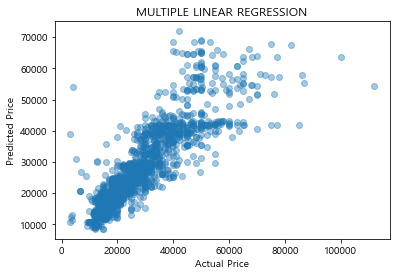

In [13]:
plt.scatter(y_test_j, y_predict_j, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

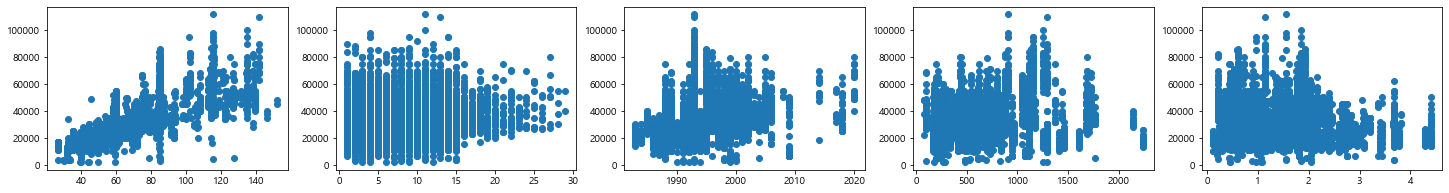

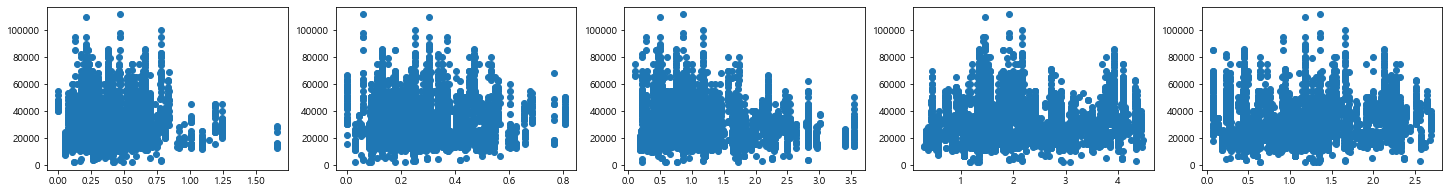

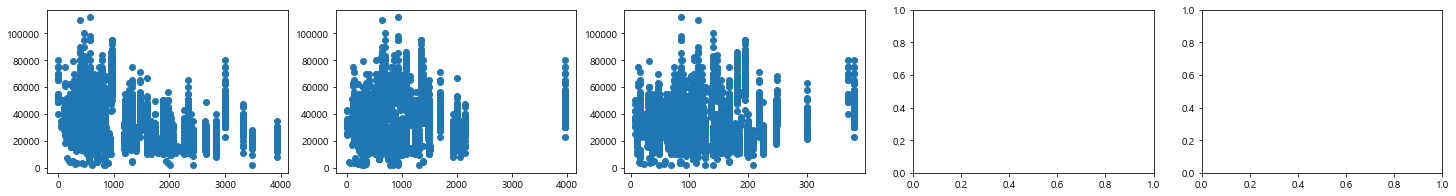

In [14]:
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(junse['전용면적(㎡)'], junse['보증금(만원)'])
    axes[1].scatter(junse['층'], junse['보증금(만원)'])
    axes[2].scatter(junse['건축년도'], junse['보증금(만원)'])
    axes[3].scatter(junse['역거리(m)'], junse['보증금(만원)'])
    axes[4].scatter(junse['병원'], junse['보증금(만원)'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(junse['공원'], junse['보증금(만원)'])
    axes[1].scatter(junse['초등학교'], junse['보증금(만원)'])
    axes[2].scatter(junse['대형마트'], junse['보증금(만원)'])
    axes[3].scatter(junse['백화점'], junse['보증금(만원)'])
    axes[4].scatter(junse['영화관'], junse['보증금(만원)'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(junse['세대수'], junse['보증금(만원)'])
    axes[1].scatter(junse['총주차대수'], junse['보증금(만원)'])
    axes[2].scatter(junse['CCTV대수'], junse['보증금(만원)'])

In [15]:
model_junse.score(x_train_j, y_train_j)

0.7626728237185084

In [17]:
model_junse.coef_

array([[ 4.64337878e+02,  3.66125260e+01,  1.85953344e+02,
         7.86229902e-01, -8.40714478e+02, -3.29616184e+01,
        -1.87163589e+03, -1.65109084e+03,  5.86581405e+02,
        -5.37730187e+02, -3.20217864e+00,  1.98641113e+00,
         2.17340385e+01]])

In [21]:
att = ['전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']

In [22]:
for i in range(len(att)):
    print(att[i], " : ", junse_buf['보증금(만원)'].corr(junse_buf[att[i]]))

전용면적(㎡)  :  0.842640052865722
층  :  0.09239378498384314
건축년도  :  0.4288204462450391
역거리(m)  :  0.24522295351746257
병원  :  -0.09963051709234533
공원  :  0.09497819222851064
초등학교  :  0.06177460295982278
대형마트  :  -0.0768433956498514
백화점  :  0.16597360932077598
영화관  :  0.10767323889519023
세대수  :  -0.3540948242837888
총주차대수  :  0.02606907645926819
CCTV대수  :  0.10842899326159497


# Multiple Linear Regression (월세, 보증금만)

In [5]:
wolse_buf = wolse[['보증금(만원)', '전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]

In [6]:
wolse_buf = wolse_buf.dropna()
wolse_buf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   보증금(만원)  3136 non-null   int64  
 1   전용면적(㎡)  3136 non-null   float64
 2   층        3136 non-null   int64  
 3   건축년도     3136 non-null   int64  
 4   역거리(m)   3136 non-null   float64
 5   병원       3136 non-null   float64
 6   공원       3136 non-null   float64
 7   초등학교     3136 non-null   float64
 8   대형마트     3136 non-null   float64
 9   백화점      3136 non-null   float64
 10  영화관      3136 non-null   float64
 11  세대수      3136 non-null   int64  
 12  총주차대수    3136 non-null   float64
 13  CCTV대수   3136 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 367.5 KB


In [113]:
x_wolse = wolse_buf[['전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]
y_wolse = wolse_buf[['보증금(만원)']]

In [114]:
x_wolse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   전용면적(㎡)  3136 non-null   float64
 1   층        3136 non-null   int64  
 2   건축년도     3136 non-null   int64  
 3   역거리(m)   3136 non-null   float64
 4   병원       3136 non-null   float64
 5   공원       3136 non-null   float64
 6   초등학교     3136 non-null   float64
 7   대형마트     3136 non-null   float64
 8   백화점      3136 non-null   float64
 9   영화관      3136 non-null   float64
 10  세대수      3136 non-null   int64  
 11  총주차대수    3136 non-null   float64
 12  CCTV대수   3136 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 343.0 KB


In [115]:
y_wolse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   보증금(만원)  3136 non-null   int64
dtypes: int64(1)
memory usage: 49.0 KB


In [116]:
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(x_wolse, y_wolse, train_size=0.8, test_size=0.2)

In [117]:
model_wolse = LinearRegression()
model_wolse.fit(x_train_w, y_train_w)

LinearRegression()

In [118]:
y_predict_w = model_wolse.predict(x_test_w)
y_predict_w

array([[ 2059.20840464],
       [-1368.72381498],
       [ 1455.13708874],
       [14204.7648749 ],
       [12689.43637996],
       [  -76.18279328],
       [ 5182.80596074],
       [25116.69059617],
       [ 8197.22732071],
       [23282.64133806],
       [17105.10193437],
       [ 5378.80090897],
       [  909.60884669],
       [15929.5972524 ],
       [28561.99491818],
       [36626.65667061],
       [ 7003.01672441],
       [ 4667.91752793],
       [ 4607.18153422],
       [ 2150.52231505],
       [ 7046.31538553],
       [10650.50847621],
       [ 1101.35094886],
       [  543.66485116],
       [16467.0274782 ],
       [ 7122.10856095],
       [-1187.7975485 ],
       [11960.13508792],
       [ 6799.62238682],
       [14928.00617561],
       [ 1254.82218249],
       [27892.92520677],
       [ 3930.50699534],
       [ 7313.83075904],
       [12718.39512987],
       [ 4570.52720103],
       [-1316.2850129 ],
       [ 5072.04141863],
       [ 3985.82965679],
       [ 3477.33387375],


D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


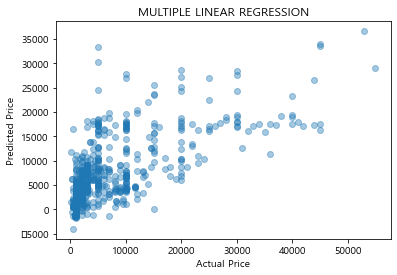

In [119]:
plt.scatter(y_test_w, y_predict_w, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

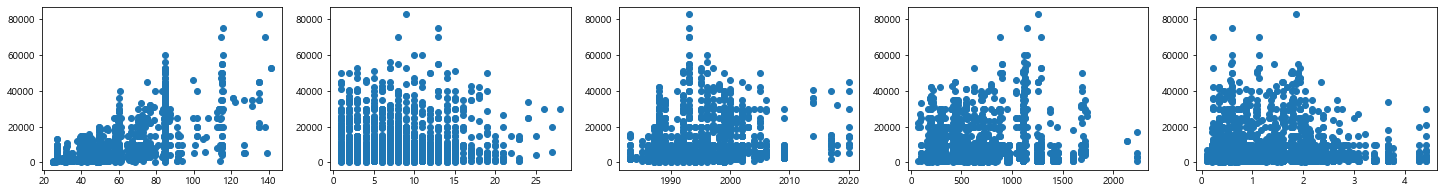

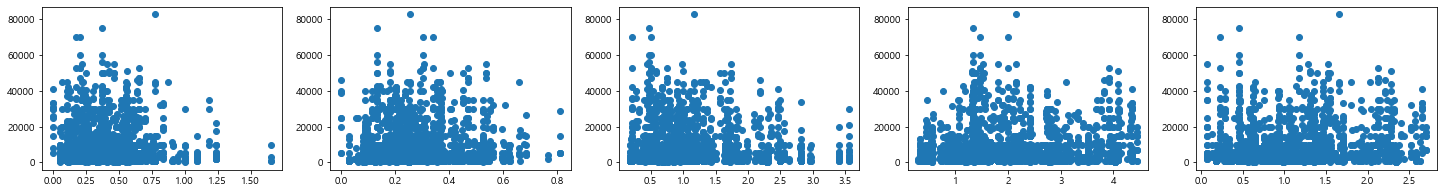

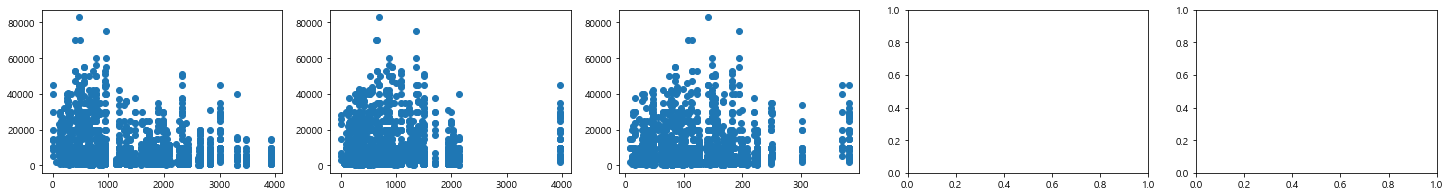

In [120]:
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(wolse['전용면적(㎡)'], wolse['보증금(만원)'])
    axes[1].scatter(wolse['층'], wolse['보증금(만원)'])
    axes[2].scatter(wolse['건축년도'], wolse['보증금(만원)'])
    axes[3].scatter(wolse['역거리(m)'], wolse['보증금(만원)'])
    axes[4].scatter(wolse['병원'], wolse['보증금(만원)'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(wolse['공원'], wolse['보증금(만원)'])
    axes[1].scatter(wolse['초등학교'], wolse['보증금(만원)'])
    axes[2].scatter(wolse['대형마트'], wolse['보증금(만원)'])
    axes[3].scatter(wolse['백화점'], wolse['보증금(만원)'])
    axes[4].scatter(wolse['영화관'], wolse['보증금(만원)'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(wolse['세대수'], wolse['보증금(만원)'])
    axes[1].scatter(wolse['총주차대수'], wolse['보증금(만원)'])
    axes[2].scatter(wolse['CCTV대수'], wolse['보증금(만원)'])

In [121]:
model_wolse.score(x_train_w, y_train_w)

0.45755467299466057

# Multiple Linear Regression (월세, 월세만)

In [11]:
wolse_buf = wolse[['월세(만원)', '전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]

In [12]:
wolse_buf = wolse_buf.dropna()
wolse_buf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월세(만원)   3136 non-null   int64  
 1   전용면적(㎡)  3136 non-null   float64
 2   층        3136 non-null   int64  
 3   건축년도     3136 non-null   int64  
 4   역거리(m)   3136 non-null   float64
 5   병원       3136 non-null   float64
 6   공원       3136 non-null   float64
 7   초등학교     3136 non-null   float64
 8   대형마트     3136 non-null   float64
 9   백화점      3136 non-null   float64
 10  영화관      3136 non-null   float64
 11  세대수      3136 non-null   int64  
 12  총주차대수    3136 non-null   float64
 13  CCTV대수   3136 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 367.5 KB


In [14]:
x_wolse = wolse_buf[['전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]
y_wolse = wolse_buf[['월세(만원)']]

In [15]:
x_wolse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   전용면적(㎡)  3136 non-null   float64
 1   층        3136 non-null   int64  
 2   건축년도     3136 non-null   int64  
 3   역거리(m)   3136 non-null   float64
 4   병원       3136 non-null   float64
 5   공원       3136 non-null   float64
 6   초등학교     3136 non-null   float64
 7   대형마트     3136 non-null   float64
 8   백화점      3136 non-null   float64
 9   영화관      3136 non-null   float64
 10  세대수      3136 non-null   int64  
 11  총주차대수    3136 non-null   float64
 12  CCTV대수   3136 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 343.0 KB


In [16]:
y_wolse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   월세(만원)  3136 non-null   int64
dtypes: int64(1)
memory usage: 49.0 KB


In [17]:
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(x_wolse, y_wolse, train_size=0.8, test_size=0.2)

In [18]:
model_wolse = LinearRegression()
model_wolse.fit(x_train_w, y_train_w)

LinearRegression()

In [19]:
y_predict_w = model_wolse.predict(x_test_w)
y_predict_w

array([[ 72.48134807],
       [ 54.17124687],
       [ 42.60040737],
       [ 38.96794783],
       [ 53.22208355],
       [ 45.26223535],
       [ 85.75766591],
       [ 50.49315812],
       [ 49.3948733 ],
       [ 44.33646722],
       [ 36.67641347],
       [ 36.37720334],
       [ 59.48081774],
       [ 81.63781113],
       [ 51.83293665],
       [ 49.16358457],
       [ 35.48027899],
       [ 45.33200084],
       [ 48.17231653],
       [ 47.49204314],
       [ 51.90282624],
       [ 45.85319504],
       [ 46.8059189 ],
       [ 67.7603848 ],
       [ 42.09700261],
       [ 51.72947671],
       [ 68.49852347],
       [ 76.76814426],
       [ 76.71728162],
       [ 62.96833202],
       [ 44.84979547],
       [ 80.24024553],
       [ 46.87913046],
       [ 38.2418557 ],
       [ 48.38212662],
       [ 36.42601125],
       [ 51.88840271],
       [ 51.91727548],
       [ 50.005079  ],
       [ 43.45383056],
       [ 47.22078584],
       [ 99.03923171],
       [ 53.93483626],
       [ 81

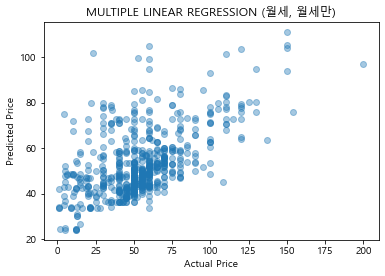

In [20]:
plt.scatter(y_test_w, y_predict_w, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MULTIPLE LINEAR REGRESSION (월세, 월세만)")
plt.show()

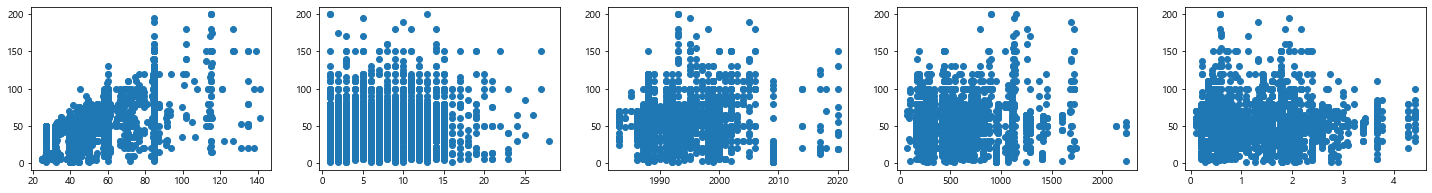

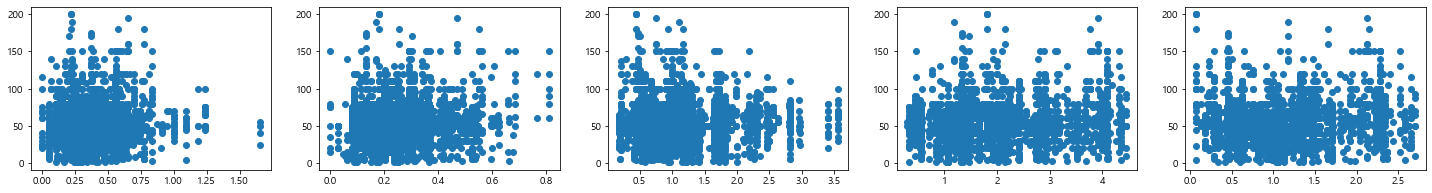

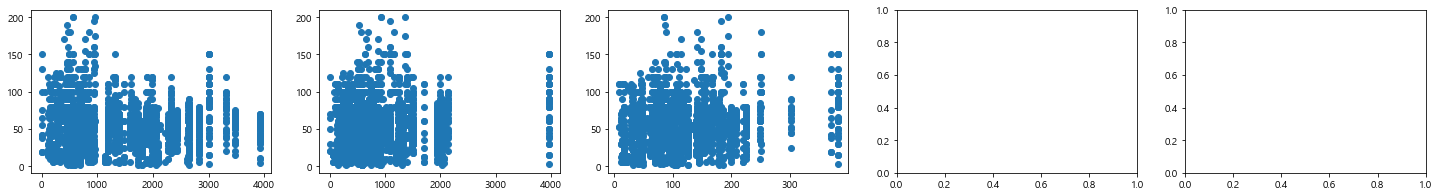

In [21]:
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(wolse['전용면적(㎡)'], wolse['월세(만원)'])
    axes[1].scatter(wolse['층'], wolse['월세(만원)'])
    axes[2].scatter(wolse['건축년도'], wolse['월세(만원)'])
    axes[3].scatter(wolse['역거리(m)'], wolse['월세(만원)'])
    axes[4].scatter(wolse['병원'], wolse['월세(만원)'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(wolse['공원'], wolse['월세(만원)'])
    axes[1].scatter(wolse['초등학교'], wolse['월세(만원)'])
    axes[2].scatter(wolse['대형마트'], wolse['월세(만원)'])
    axes[3].scatter(wolse['백화점'], wolse['월세(만원)'])
    axes[4].scatter(wolse['영화관'], wolse['월세(만원)'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(wolse['세대수'], wolse['월세(만원)'])
    axes[1].scatter(wolse['총주차대수'], wolse['월세(만원)'])
    axes[2].scatter(wolse['CCTV대수'], wolse['월세(만원)'])

In [22]:
model_wolse.score(x_train_w, y_train_w)

0.2675249290312832

# Multiple Linear Regression (월세, 전환율=2.5%)

In [32]:
wolse_buf = wolse[['월세(만원)', '보증금(만원)', '전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]

In [33]:
wolse_buf = wolse_buf.dropna()
wolse_buf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월세(만원)   3136 non-null   int64  
 1   보증금(만원)  3136 non-null   int64  
 2   전용면적(㎡)  3136 non-null   float64
 3   층        3136 non-null   int64  
 4   건축년도     3136 non-null   int64  
 5   역거리(m)   3136 non-null   float64
 6   병원       3136 non-null   float64
 7   공원       3136 non-null   float64
 8   초등학교     3136 non-null   float64
 9   대형마트     3136 non-null   float64
 10  백화점      3136 non-null   float64
 11  영화관      3136 non-null   float64
 12  세대수      3136 non-null   int64  
 13  총주차대수    3136 non-null   float64
 14  CCTV대수   3136 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 392.0 KB


In [34]:
wolse_buf['월세전환(만원)'] = ((wolse_buf['월세(만원)'] * 12) / 0.025) + wolse_buf['보증금(만원)']
wolse_buf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   월세(만원)    3136 non-null   int64  
 1   보증금(만원)   3136 non-null   int64  
 2   전용면적(㎡)   3136 non-null   float64
 3   층         3136 non-null   int64  
 4   건축년도      3136 non-null   int64  
 5   역거리(m)    3136 non-null   float64
 6   병원        3136 non-null   float64
 7   공원        3136 non-null   float64
 8   초등학교      3136 non-null   float64
 9   대형마트      3136 non-null   float64
 10  백화점       3136 non-null   float64
 11  영화관       3136 non-null   float64
 12  세대수       3136 non-null   int64  
 13  총주차대수     3136 non-null   float64
 14  CCTV대수    3136 non-null   float64
 15  월세전환(만원)  3136 non-null   float64
dtypes: float64(11), int64(5)
memory usage: 416.5 KB


In [35]:
x_wolse = wolse_buf[['전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]
y_wolse = wolse_buf[['월세전환(만원)']]

In [36]:
x_wolse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   전용면적(㎡)  3136 non-null   float64
 1   층        3136 non-null   int64  
 2   건축년도     3136 non-null   int64  
 3   역거리(m)   3136 non-null   float64
 4   병원       3136 non-null   float64
 5   공원       3136 non-null   float64
 6   초등학교     3136 non-null   float64
 7   대형마트     3136 non-null   float64
 8   백화점      3136 non-null   float64
 9   영화관      3136 non-null   float64
 10  세대수      3136 non-null   int64  
 11  총주차대수    3136 non-null   float64
 12  CCTV대수   3136 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 343.0 KB


In [37]:
y_wolse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   월세전환(만원)  3136 non-null   float64
dtypes: float64(1)
memory usage: 49.0 KB


In [38]:
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(x_wolse, y_wolse, train_size=0.8, test_size=0.2)

In [39]:
model_wolse_conv2 = LinearRegression()
model_wolse_conv2.fit(x_train_w, y_train_w)

LinearRegression()

In [40]:
y_predict_w = model_wolse_conv2.predict(x_test_w)
y_predict_w

array([[37727.5213404 ],
       [50684.54362643],
       [20010.40970213],
       [50029.04362711],
       [22110.71534402],
       [35085.50955632],
       [18429.77628029],
       [26488.1268783 ],
       [84504.06092318],
       [41730.58461101],
       [54016.19437507],
       [50413.24343481],
       [23479.18717493],
       [19668.85759827],
       [34139.5542779 ],
       [26091.12714939],
       [17348.66567724],
       [30463.23304516],
       [50979.24044766],
       [38797.25925335],
       [16748.38192249],
       [33149.46161424],
       [33997.06235814],
       [27557.47665932],
       [74334.20324263],
       [28783.32687211],
       [33643.13768344],
       [24570.92434223],
       [24041.35554669],
       [27164.61651251],
       [20335.28022245],
       [40175.3564243 ],
       [25353.14565017],
       [20606.58041407],
       [28114.16718318],
       [26953.46790257],
       [22437.68561365],
       [12777.19433071],
       [16096.89554831],
       [56508.27805961],


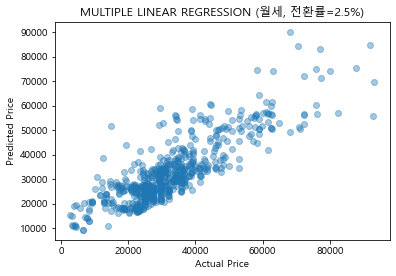

In [41]:
plt.scatter(y_test_w, y_predict_w, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MULTIPLE LINEAR REGRESSION (월세, 전환률=2.5%)")
plt.show()

In [42]:
((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)'])

16       61000.0
20       63000.0
21       62800.0
27       92000.0
28        3370.0
          ...   
11661    68000.0
11672    80000.0
11676    52000.0
11689    79600.0
11692    85760.0
Length: 3207, dtype: float64

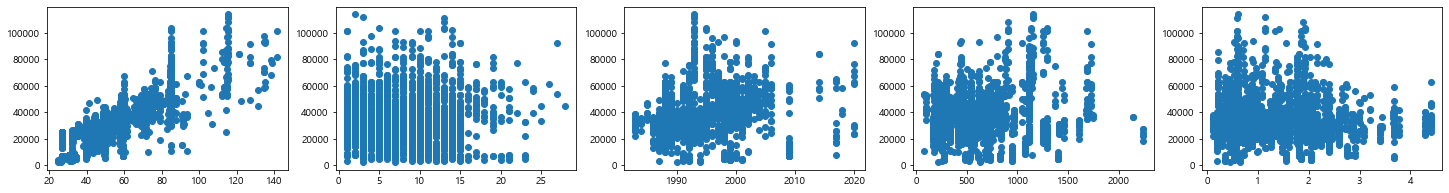

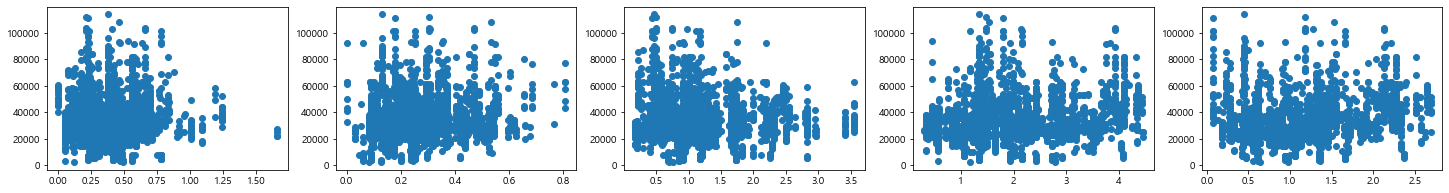

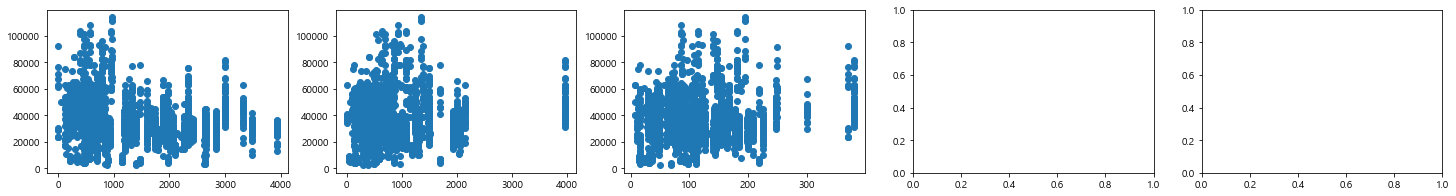

In [43]:
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(wolse['전용면적(㎡)'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))
    axes[1].scatter(wolse['층'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))
    axes[2].scatter(wolse['건축년도'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))
    axes[3].scatter(wolse['역거리(m)'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))
    axes[4].scatter(wolse['병원'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(wolse['공원'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))
    axes[1].scatter(wolse['초등학교'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))
    axes[2].scatter(wolse['대형마트'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))
    axes[3].scatter(wolse['백화점'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))
    axes[4].scatter(wolse['영화관'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(wolse['세대수'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))
    axes[1].scatter(wolse['총주차대수'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))
    axes[2].scatter(wolse['CCTV대수'], ((wolse['월세(만원)'] * 12 / 0.025) + wolse['보증금(만원)']))

In [44]:
model_wolse_conv2.score(x_train_w, y_train_w)

0.7079648087774197

In [45]:
model_wolse_conv2.coef_

array([[ 6.25599697e+02,  1.35650096e+02, -2.25744694e+02,
         1.53265602e+00, -1.37042202e+03, -6.09582028e+02,
         2.81312565e+03, -1.39151938e+03,  1.36204281e+03,
        -1.50433369e+03, -2.63051462e+00,  6.95011818e-01,
         3.16583328e+01]])

In [49]:
att = ['전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']

In [51]:
for i in range(len(att)):
    print(att[i], " : ", wolse_buf['월세(만원)'].corr(wolse_buf[att[i]]))

전용면적(㎡)  :  0.4939969990688314
층  :  0.03501664105733523
건축년도  :  0.053144278479892684
역거리(m)  :  0.06964848696445507
병원  :  -0.0679821645838476
공원  :  0.062409047966937414
초등학교  :  0.07867366626037817
대형마트  :  -0.06083276493121838
백화점  :  0.15006735463693455
영화관  :  0.09220031893238403
세대수  :  -0.017952646490064464
총주차대수  :  0.14786574200805686
CCTV대수  :  0.16831001903980422


# Multiple Linear Regression (월세, 전환율=4.0%)

In [52]:
wolse_buf.drop(['월세전환(만원)'], axis=1, inplace=True)
wolse_buf

,월세(만원),보증금(만원),전용면적(㎡),층,건축년도,역거리(m),병원,공원,초등학교,대형마트,백화점,영화관,세대수,총주차대수,CCTV대수
16,75,25000,99.917,4,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0
20,50,39000,134.914,8,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0
21,35,46000,99.917,4,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0
27,150,20000,134.914,15,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0
28,6,490,24.790,10,1994,628.027479,0.658377,0.493933,0.126267,0.70,2.78,0.98,1395,383.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11661,100,20000,138.290,9,1993,879.641693,0.876987,0.587864,0.370133,0.82,1.92,0.44,498,622.0,108.0
11672,150,8000,112.240,11,1993,879.641693,0.876987,0.587864,0.370133,0.82,1.92,0.44,498,622.0,108.0
11676,50,28000,112.240,10,1993,879.641693,0.876987,0.587864,0.370133,0.82,1.92,0.44,498,622.0,108.0
11689,20,70000,138.290,8,1993,879.641693,0.225040,0.173319,0.338400,0.22,1.99,0.23,498,622.0,108.0


In [53]:
wolse_buf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   월세(만원)   3136 non-null   int64  
 1   보증금(만원)  3136 non-null   int64  
 2   전용면적(㎡)  3136 non-null   float64
 3   층        3136 non-null   int64  
 4   건축년도     3136 non-null   int64  
 5   역거리(m)   3136 non-null   float64
 6   병원       3136 non-null   float64
 7   공원       3136 non-null   float64
 8   초등학교     3136 non-null   float64
 9   대형마트     3136 non-null   float64
 10  백화점      3136 non-null   float64
 11  영화관      3136 non-null   float64
 12  세대수      3136 non-null   int64  
 13  총주차대수    3136 non-null   float64
 14  CCTV대수   3136 non-null   float64
dtypes: float64(10), int64(5)
memory usage: 472.0 KB


In [54]:
wolse_buf['월세전환4.0(만원)'] = ((wolse_buf['월세(만원)'] * 12) / 0.040) + wolse_buf['보증금(만원)']
wolse_buf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   월세(만원)       3136 non-null   int64  
 1   보증금(만원)      3136 non-null   int64  
 2   전용면적(㎡)      3136 non-null   float64
 3   층            3136 non-null   int64  
 4   건축년도         3136 non-null   int64  
 5   역거리(m)       3136 non-null   float64
 6   병원           3136 non-null   float64
 7   공원           3136 non-null   float64
 8   초등학교         3136 non-null   float64
 9   대형마트         3136 non-null   float64
 10  백화점          3136 non-null   float64
 11  영화관          3136 non-null   float64
 12  세대수          3136 non-null   int64  
 13  총주차대수        3136 non-null   float64
 14  CCTV대수       3136 non-null   float64
 15  월세전환4.0(만원)  3136 non-null   float64
dtypes: float64(11), int64(5)
memory usage: 496.5 KB


In [55]:
x_wolse = wolse_buf[['전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]
y_wolse = wolse_buf[['월세전환4.0(만원)']]

In [56]:
x_wolse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   전용면적(㎡)  3136 non-null   float64
 1   층        3136 non-null   int64  
 2   건축년도     3136 non-null   int64  
 3   역거리(m)   3136 non-null   float64
 4   병원       3136 non-null   float64
 5   공원       3136 non-null   float64
 6   초등학교     3136 non-null   float64
 7   대형마트     3136 non-null   float64
 8   백화점      3136 non-null   float64
 9   영화관      3136 non-null   float64
 10  세대수      3136 non-null   int64  
 11  총주차대수    3136 non-null   float64
 12  CCTV대수   3136 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 423.0 KB


In [57]:
y_wolse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   월세전환4.0(만원)  3136 non-null   float64
dtypes: float64(1)
memory usage: 129.0 KB


In [58]:
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(x_wolse, y_wolse, train_size=0.8, test_size=0.2)

In [59]:
model_wolse_conv4 = LinearRegression()
model_wolse_conv4.fit(x_train_w, y_train_w)

LinearRegression()

In [60]:
y_predict_w = model_wolse_conv2.predict(x_test_w)
y_predict_w

array([[28344.73472247],
       [15095.6461117 ],
       [25679.50030607],
       [43054.72314766],
       [37878.56023537],
       [ 9204.78569287],
       [34137.76080657],
       [31374.21702037],
       [21955.11151452],
       [33123.30117561],
       [27373.36965978],
       [37591.87124459],
       [26311.24463992],
       [24442.3270314 ],
       [15135.06022572],
       [19502.49930023],
       [21703.76505659],
       [21518.7375182 ],
       [24301.49968876],
       [31622.00806459],
       [30641.21410921],
       [14010.44534522],
       [30840.85635235],
       [14355.08422805],
       [27832.66024504],
       [25213.34870023],
       [26366.47068562],
       [52196.38250567],
       [20208.16008715],
       [27926.8627905 ],
       [47338.92719075],
       [27594.51579976],
       [16941.71538981],
       [19804.50769408],
       [57507.51315807],
       [27697.01014923],
       [28114.16718318],
       [22813.01927585],
       [29295.562487  ],
       [54115.46330237],


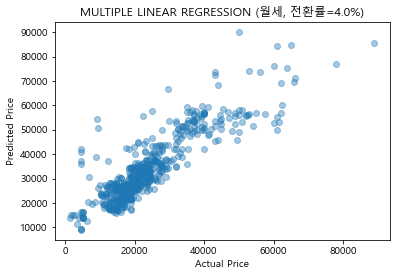

In [61]:
plt.scatter(y_test_w, y_predict_w, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MULTIPLE LINEAR REGRESSION (월세, 전환률=4.0%)")
plt.show()

In [62]:
((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)'])

16       47500.0
20       54000.0
21       56500.0
27       65000.0
28        2290.0
          ...   
11661    50000.0
11672    53000.0
11676    43000.0
11689    76000.0
11692    61100.0
Length: 3207, dtype: float64

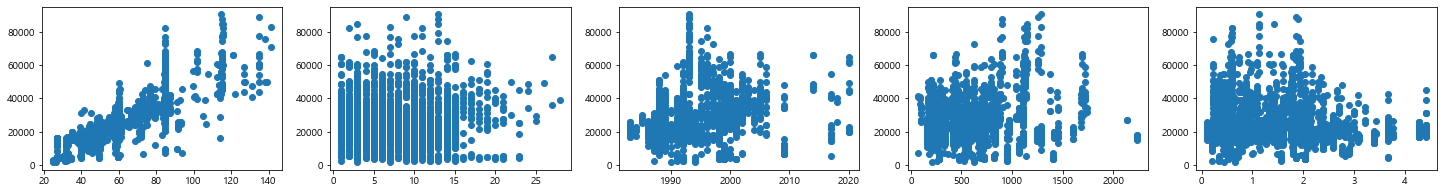

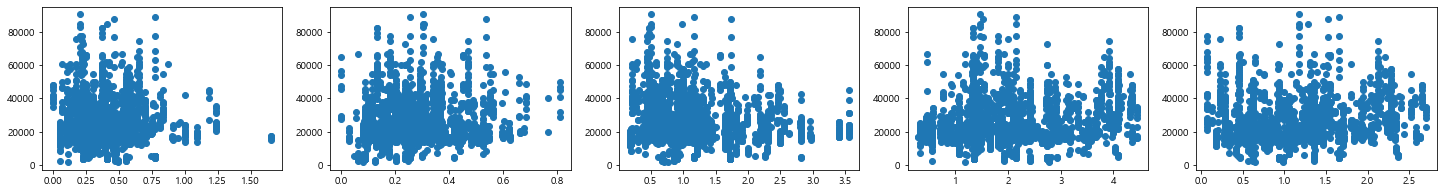

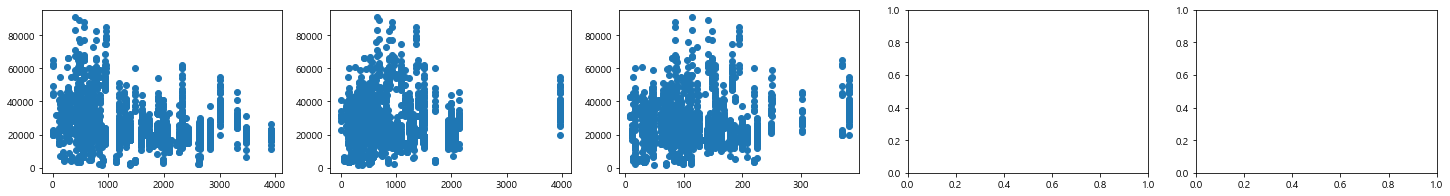

In [63]:
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(wolse['전용면적(㎡)'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))
    axes[1].scatter(wolse['층'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))
    axes[2].scatter(wolse['건축년도'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))
    axes[3].scatter(wolse['역거리(m)'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))
    axes[4].scatter(wolse['병원'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(wolse['공원'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))
    axes[1].scatter(wolse['초등학교'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))
    axes[2].scatter(wolse['대형마트'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))
    axes[3].scatter(wolse['백화점'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))
    axes[4].scatter(wolse['영화관'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(wolse['세대수'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))
    axes[1].scatter(wolse['총주차대수'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))
    axes[2].scatter(wolse['CCTV대수'], ((wolse['월세(만원)'] * 12 / 0.040) + wolse['보증금(만원)']))

In [64]:
model_wolse_conv4.score(x_train_w, y_train_w)

0.7696880204556007

In [65]:
model_wolse_conv4.coef_

array([[ 5.02084875e+02,  7.63076436e+01, -1.27802848e+02,
         1.73513001e+00, -1.19343883e+03, -3.86503468e+02,
         2.37735588e+03, -6.45281995e+02,  8.86302935e+02,
        -1.28908755e+03, -2.27784000e+00,  5.51193415e-01,
         2.18158699e+01]])

In [66]:
att = ['전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']

In [67]:
for i in range(len(att)):
    print(att[i], " : ", wolse_buf['월세(만원)'].corr(wolse_buf[att[i]]))

전용면적(㎡)  :  0.4939969990688314
층  :  0.03501664105733523
건축년도  :  0.053144278479892684
역거리(m)  :  0.06964848696445507
병원  :  -0.0679821645838476
공원  :  0.062409047966937414
초등학교  :  0.07867366626037817
대형마트  :  -0.06083276493121838
백화점  :  0.15006735463693455
영화관  :  0.09220031893238403
세대수  :  -0.017952646490064464
총주차대수  :  0.14786574200805686
CCTV대수  :  0.16831001903980422


# Multiple Linear Regression (월세, 전환율=4.0%(10월이전), 2.5%(10월이후))

#### 전월세 전환율이 기존 4%에서 2020년 10월부터 2.5%로 하향 so 4%로 계산한 것의 정확도가 더 높음
#### 거래일자 기준 10월 이전은 4%, 10월 이후는 2.5%로 계산 가능할까?

In [78]:
wolse[(wolse['계약년월'] - 202000) >= 10]

,시군구_x,번지,본번,부번,단지명_x,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),...,승강기(기타),총주차대수,지상주차대수,지하주차대수,CCTV대수,"주차관제, 홈네트워크",관리사무소 주소,관리사무소 연락처,관리사무소 팩스,부대복리시설
21,서울특별시 노원구 공릉동,106,106.0,0.0,공릉 해링턴플레이스,월세,99.917,202010,31,46000,...,0.0,986.0,286.0,700.0,105.0,무,서울시 노원구 노원로 62(공릉2동),029496295,29496296.0,"관리사무소, 노인정, 어린이놀이터"
27,서울특별시 노원구 공릉동,106,106.0,0.0,공릉 해링턴플레이스,월세,134.914,202012,24,20000,...,0.0,986.0,286.0,700.0,105.0,무,서울시 노원구 노원로 62(공릉2동),029496295,29496296.0,"관리사무소, 노인정, 어린이놀이터"
32,서울특별시 노원구 공릉동,708,708.0,0.0,공릉1단지아파트,월세,24.790,202010,29,1038,...,0.0,383.0,289.0,94.0,69.0,무,서울시 노원구 동일로1127,029748290,29784935.0,"관리사무소, 노인정, 주민공동시설, 어린이놀이터, 유치원, 자전거보관소"
39,서울특별시 노원구 공릉동,749,749.0,0.0,공릉2신도브래뉴아파트,월세,72.840,202010,11,20000,...,0.0,150.0,10.0,140.0,32.0,무,서울 노원구 동일로 193길 7,029731567,29732360.0,"관리사무소, 노인정, 보육시설, 어린이놀이터"
86,서울특별시 노원구 공릉동,110,110.0,0.0,공릉아파트,월세,33.180,202012,21,1082,...,0.0,350.0,162.0,188.0,36.0,무,서울시 노원구 화랑로 51길 81 공릉아파트,029760657,29760659.0,"관리사무소, 노인정, 보육시설, 주민공동시설, 어린이놀이터, 자전거보관소"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11628,서울특별시 노원구 하계동,354,354.0,0.0,학여울청구,월세,84.770,202011,18,38000,...,0.0,138.0,66.0,72.0,16.0,무,서울특별시 노원구 동일로207길 186(117-113),29754317,29754318.0,"관리사무소, 어린이놀이터, 휴게시설, 자전거보관소"
11633,서울특별시 노원구 하계동,354,354.0,0.0,학여울청구,월세,113.510,202012,4,30000,...,0.0,1699.0,882.0,817.0,219.0,무,서울시 노원구 동일로207길 186,29776816,29787683.0,"관리사무소, 노인정, 어린이놀이터"
11634,서울특별시 노원구 하계동,354,354.0,0.0,학여울청구,월세,113.510,202012,4,30000,...,0.0,138.0,66.0,72.0,16.0,무,서울특별시 노원구 동일로207길 186(117-113),29754317,29754318.0,"관리사무소, 어린이놀이터, 휴게시설, 자전거보관소"
11689,서울특별시 노원구 하계동,256-5,256.0,5.0,한신동성,월세,138.290,202010,7,70000,...,0.0,622.0,299.0,323.0,108.0,유,서울시 노원구 한글비석로 151,29735383,29743679.0,"관리사무소, 노인정, 어린이놀이터"


In [80]:
wolse_buf = wolse[['계약년월', '월세(만원)', '보증금(만원)', '전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]

In [81]:
wolse_buf = wolse_buf.dropna()
wolse_buf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   계약년월     3136 non-null   int64  
 1   월세(만원)   3136 non-null   int64  
 2   보증금(만원)  3136 non-null   int64  
 3   전용면적(㎡)  3136 non-null   float64
 4   층        3136 non-null   int64  
 5   건축년도     3136 non-null   int64  
 6   역거리(m)   3136 non-null   float64
 7   병원       3136 non-null   float64
 8   공원       3136 non-null   float64
 9   초등학교     3136 non-null   float64
 10  대형마트     3136 non-null   float64
 11  백화점      3136 non-null   float64
 12  영화관      3136 non-null   float64
 13  세대수      3136 non-null   int64  
 14  총주차대수    3136 non-null   float64
 15  CCTV대수   3136 non-null   float64
dtypes: float64(10), int64(6)
memory usage: 416.5 KB


In [116]:
wolse_buf_after = wolse_buf[(wolse_buf['계약년월'] - 202000) >= 10]
wolse_buf_after.head(5)

,계약년월,월세(만원),보증금(만원),전용면적(㎡),층,건축년도,역거리(m),병원,공원,초등학교,대형마트,백화점,영화관,세대수,총주차대수,CCTV대수
21,202010,35,46000,99.917,4,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0
27,202012,150,20000,134.914,15,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0
32,202010,6,1038,24.790,11,1994,628.027479,0.658377,0.493933,0.126267,0.70,2.78,0.98,1395,383.0,69.0
39,202010,70,20000,72.840,12,2002,74.837410,1.006390,0.365450,0.305130,0.90,3.42,1.63,138,150.0,32.0
86,202012,15,1082,33.180,9,1999,604.957270,0.591189,0.278378,0.298135,2.26,4.08,2.37,691,350.0,36.0


In [117]:
wolse_buf_before = wolse_buf[(wolse_buf['계약년월'] - 202000) < 10]
wolse_buf_before.head(5)

,계약년월,월세(만원),보증금(만원),전용면적(㎡),층,건축년도,역거리(m),병원,공원,초등학교,대형마트,백화점,영화관,세대수,총주차대수,CCTV대수
16,202007,75,25000,99.917,4,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0
20,202009,50,39000,134.914,8,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0
28,202003,6,490,24.790,10,1994,628.027479,0.658377,0.493933,0.126267,0.70,2.78,0.98,1395,383.0,69.0
29,202003,6,490,24.790,12,1994,628.027479,0.658377,0.493933,0.126267,0.70,2.78,0.98,1395,383.0,69.0
30,202003,4,164,24.790,3,1994,628.027479,0.658377,0.493933,0.126267,0.70,2.78,0.98,1395,383.0,69.0


In [119]:
wolse_buf_after['월세전환(만원)'] = (wolse_buf_after['월세(만원)'] * 12) / 0.025 + wolse_buf_after['보증금(만원)']
wolse_buf_after.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 21 to 11692
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   계약년월      713 non-null    int64  
 1   월세(만원)    713 non-null    int64  
 2   보증금(만원)   713 non-null    int64  
 3   전용면적(㎡)   713 non-null    float64
 4   층         713 non-null    int64  
 5   건축년도      713 non-null    int64  
 6   역거리(m)    713 non-null    float64
 7   병원        713 non-null    float64
 8   공원        713 non-null    float64
 9   초등학교      713 non-null    float64
 10  대형마트      713 non-null    float64
 11  백화점       713 non-null    float64
 12  영화관       713 non-null    float64
 13  세대수       713 non-null    int64  
 14  총주차대수     713 non-null    float64
 15  CCTV대수    713 non-null    float64
 16  월세전환(만원)  713 non-null    float64
dtypes: float64(11), int64(6)
memory usage: 100.3 KB


<ipython-input-119-fdaa28c42df5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolse_buf_after['월세전환(만원)'] = (wolse_buf_after['월세(만원)'] * 12) / 0.025 + wolse_buf_after['보증금(만원)']


In [120]:
wolse_buf_before['월세전환(만원)'] = (wolse_buf_before['월세(만원)'] * 12) / 0.040 + wolse_buf_before['보증금(만원)']
wolse_buf_before.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2423 entries, 16 to 11676
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   계약년월      2423 non-null   int64  
 1   월세(만원)    2423 non-null   int64  
 2   보증금(만원)   2423 non-null   int64  
 3   전용면적(㎡)   2423 non-null   float64
 4   층         2423 non-null   int64  
 5   건축년도      2423 non-null   int64  
 6   역거리(m)    2423 non-null   float64
 7   병원        2423 non-null   float64
 8   공원        2423 non-null   float64
 9   초등학교      2423 non-null   float64
 10  대형마트      2423 non-null   float64
 11  백화점       2423 non-null   float64
 12  영화관       2423 non-null   float64
 13  세대수       2423 non-null   int64  
 14  총주차대수     2423 non-null   float64
 15  CCTV대수    2423 non-null   float64
 16  월세전환(만원)  2423 non-null   float64
dtypes: float64(11), int64(6)
memory usage: 340.7 KB


<ipython-input-120-e8bc36cbf019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wolse_buf_before['월세전환(만원)'] = (wolse_buf_before['월세(만원)'] * 12) / 0.040 + wolse_buf_before['보증금(만원)']


In [122]:
wolse_buf_concat = pd.concat([wolse_buf_before, wolse_buf_after])
wolse_buf_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   계약년월      3136 non-null   int64  
 1   월세(만원)    3136 non-null   int64  
 2   보증금(만원)   3136 non-null   int64  
 3   전용면적(㎡)   3136 non-null   float64
 4   층         3136 non-null   int64  
 5   건축년도      3136 non-null   int64  
 6   역거리(m)    3136 non-null   float64
 7   병원        3136 non-null   float64
 8   공원        3136 non-null   float64
 9   초등학교      3136 non-null   float64
 10  대형마트      3136 non-null   float64
 11  백화점       3136 non-null   float64
 12  영화관       3136 non-null   float64
 13  세대수       3136 non-null   int64  
 14  총주차대수     3136 non-null   float64
 15  CCTV대수    3136 non-null   float64
 16  월세전환(만원)  3136 non-null   float64
dtypes: float64(11), int64(6)
memory usage: 441.0 KB


In [123]:
wolse_buf_concat.head(10)

,계약년월,월세(만원),보증금(만원),전용면적(㎡),층,건축년도,역거리(m),병원,공원,초등학교,대형마트,백화점,영화관,세대수,총주차대수,CCTV대수,월세전환(만원)
16,202007,75,25000,99.917,4,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0,47500.0
20,202009,50,39000,134.914,8,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0,54000.0
28,202003,6,490,24.790,10,1994,628.027479,0.658377,0.493933,0.126267,0.70,2.78,0.98,1395,383.0,69.0,2290.0
29,202003,6,490,24.790,12,1994,628.027479,0.658377,0.493933,0.126267,0.70,2.78,0.98,1395,383.0,69.0,2290.0
30,202003,4,164,24.790,3,1994,628.027479,0.658377,0.493933,0.126267,0.70,2.78,0.98,1395,383.0,69.0,1364.0
31,202003,6,490,24.790,15,1994,628.027479,0.658377,0.493933,0.126267,0.70,2.78,0.98,1395,383.0,69.0,2290.0
34,202003,20,1000,84.750,3,2002,74.837410,1.006390,0.365450,0.305130,0.90,3.42,1.63,138,150.0,32.0,7000.0
35,202006,65,22000,84.480,5,2002,74.837410,1.006390,0.365450,0.305130,0.90,3.42,1.63,138,150.0,32.0,41500.0
44,202001,28,18000,59.400,9,2000,873.992427,0.703897,0.391520,0.405840,1.06,2.82,1.08,561,630.0,96.0,26400.0
45,202002,10,23000,59.400,4,2000,873.992427,0.703897,0.391520,0.405840,1.06,2.82,1.08,561,630.0,96.0,26000.0


In [124]:
wolse_buf_concat.tail(10)

,계약년월,월세(만원),보증금(만원),전용면적(㎡),층,건축년도,역거리(m),병원,공원,초등학교,대형마트,백화점,영화관,세대수,총주차대수,CCTV대수,월세전환(만원)
11597,202010,45,24000,59.40,3,1999,725.848617,0.522984,0.228118,0.237709,0.91,2.73,0.94,1476,1699.0,219.0,45600.0
11598,202010,45,24000,59.40,3,1999,725.848617,0.522984,0.228118,0.237709,0.91,2.73,0.94,486,138.0,16.0,45600.0
11613,202010,110,4000,84.77,2,1999,725.848617,0.522984,0.228118,0.237709,0.91,2.73,0.94,1476,1699.0,219.0,56800.0
11614,202010,110,4000,84.77,2,1999,725.848617,0.522984,0.228118,0.237709,0.91,2.73,0.94,486,138.0,16.0,56800.0
11627,202011,25,38000,84.77,18,1999,725.848617,0.522984,0.228118,0.237709,0.91,2.73,0.94,1476,1699.0,219.0,50000.0
11628,202011,25,38000,84.77,18,1999,725.848617,0.522984,0.228118,0.237709,0.91,2.73,0.94,486,138.0,16.0,50000.0
11633,202012,100,30000,113.51,15,1999,725.848617,0.522984,0.228118,0.237709,0.91,2.73,0.94,1476,1699.0,219.0,78000.0
11634,202012,100,30000,113.51,15,1999,725.848617,0.522984,0.228118,0.237709,0.91,2.73,0.94,486,138.0,16.0,78000.0
11689,202010,20,70000,138.29,8,1993,879.641693,0.225040,0.173319,0.338400,0.22,1.99,0.23,498,622.0,108.0,79600.0
11692,202012,137,20000,112.24,3,1993,879.641693,0.225040,0.173319,0.338400,0.22,1.99,0.23,498,622.0,108.0,85760.0


In [125]:
x_wolse = wolse_buf_concat[['전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]
y_wolse = wolse_buf_concat[['월세전환(만원)']]

In [126]:
x_wolse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   전용면적(㎡)  3136 non-null   float64
 1   층        3136 non-null   int64  
 2   건축년도     3136 non-null   int64  
 3   역거리(m)   3136 non-null   float64
 4   병원       3136 non-null   float64
 5   공원       3136 non-null   float64
 6   초등학교     3136 non-null   float64
 7   대형마트     3136 non-null   float64
 8   백화점      3136 non-null   float64
 9   영화관      3136 non-null   float64
 10  세대수      3136 non-null   int64  
 11  총주차대수    3136 non-null   float64
 12  CCTV대수   3136 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 343.0 KB


In [127]:
y_wolse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3136 entries, 16 to 11692
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   월세전환(만원)  3136 non-null   float64
dtypes: float64(1)
memory usage: 49.0 KB


In [128]:
x_train_w, x_test_w, y_train_w, y_test_w = train_test_split(x_wolse, y_wolse, train_size=0.8, test_size=0.2)

In [129]:
model_wolse_conv = LinearRegression()
model_wolse_conv.fit(x_train_w, y_train_w)

LinearRegression()

In [130]:
y_predict_w = model_wolse_conv.predict(x_test_w)
y_predict_w

array([[47468.22392561],
       [18188.2799041 ],
       [34933.53788781],
       [21099.37997872],
       [10229.74754896],
       [14942.5518082 ],
       [29150.17773764],
       [18030.86182614],
       [16104.2213659 ],
       [20325.85454272],
       [44948.74284845],
       [19531.81192003],
       [26063.15279916],
       [34851.85493317],
       [22856.61975766],
       [21370.19858609],
       [20552.06915103],
       [33707.31845767],
       [19993.82542474],
       [22291.70867423],
       [16406.8833466 ],
       [12367.50031847],
       [45334.26760026],
       [23698.4460574 ],
       [26964.60318144],
       [15581.23263923],
       [12457.77318759],
       [38051.76190135],
       [15904.35700005],
       [13813.93453409],
       [19101.96700484],
       [14934.56365714],
       [60956.15739097],
       [20531.58013422],
       [19821.33927329],
       [20957.76462657],
       [52142.71413078],
       [19214.1984366 ],
       [14820.12436239],
       [17436.10423004],


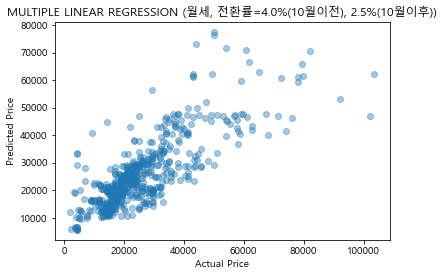

In [131]:
plt.scatter(y_test_w, y_predict_w, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MULTIPLE LINEAR REGRESSION (월세, 전환률=4.0%(10월이전), 2.5%(10월이후))")
plt.show()

In [132]:
model_wolse_conv.score(x_train_w, y_train_w)

0.6540125095454024

### 가장 정확도가 높은 월세 계산방법 = 전환율 4.0%

# Multiple Linear Regression (전세, 역 거리 범주화)

In [29]:
junse[junse['역거리(m)'] <= 500].shape

(4101, 76)

In [30]:
junse[junse['역거리(m)'] > 500].shape

(4387, 76)

In [31]:
junse['역세권'] = junse['역거리(m)'] <= 500

<ipython-input-31-60d256f95c19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junse['역세권'] = junse['역거리(m)'] <= 500


In [32]:
junse.역세권 = junse.역세권.replace(True, 1)
junse.역세권 = junse.역세권.replace(False, 0)

D:\program\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [34]:
junse[junse['역세권'] == 1].shape

(4101, 77)

In [36]:
junse_buf = junse[['보증금(만원)', '전용면적(㎡)', '층', '건축년도', '역세권', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]

In [37]:
junse_buf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8488 entries, 0 to 11694
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   보증금(만원)  8488 non-null   int64  
 1   전용면적(㎡)  8488 non-null   float64
 2   층        8488 non-null   int64  
 3   건축년도     8488 non-null   int64  
 4   역세권      8488 non-null   float64
 5   병원       8321 non-null   float64
 6   공원       8321 non-null   float64
 7   초등학교     8321 non-null   float64
 8   대형마트     8321 non-null   float64
 9   백화점      8321 non-null   float64
 10  영화관      8321 non-null   float64
 11  세대수      8488 non-null   int64  
 12  총주차대수    8488 non-null   float64
 13  CCTV대수   8464 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 994.7 KB


In [38]:
junse_buf = junse_buf.dropna()
junse_buf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8301 entries, 0 to 11694
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   보증금(만원)  8301 non-null   int64  
 1   전용면적(㎡)  8301 non-null   float64
 2   층        8301 non-null   int64  
 3   건축년도     8301 non-null   int64  
 4   역세권      8301 non-null   float64
 5   병원       8301 non-null   float64
 6   공원       8301 non-null   float64
 7   초등학교     8301 non-null   float64
 8   대형마트     8301 non-null   float64
 9   백화점      8301 non-null   float64
 10  영화관      8301 non-null   float64
 11  세대수      8301 non-null   int64  
 12  총주차대수    8301 non-null   float64
 13  CCTV대수   8301 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 972.8 KB


In [39]:
x_junse = junse_buf[['전용면적(㎡)', '층', '건축년도', '역세권', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]
y_junse = junse_buf[['보증금(만원)']]

In [40]:
x_train_j, x_test_j, y_train_j, y_test_j = train_test_split(x_junse, y_junse, train_size=0.8, test_size=0.2)

In [41]:
model_junse_sub = LinearRegression()
model_junse_sub.fit(x_train_j, y_train_j)

LinearRegression()

In [42]:
y_predict_j = model_junse_sub.predict(x_test_j)
y_predict_j

array([[40288.62945126],
       [56035.23577817],
       [22435.60712152],
       ...,
       [19991.06569775],
       [19930.58192884],
       [18137.1037167 ]])

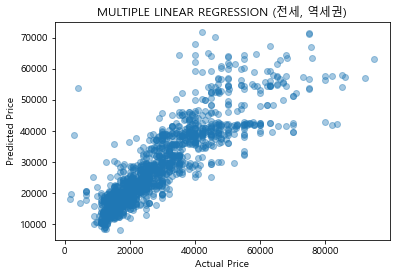

In [43]:
plt.scatter(y_test_j, y_predict_j, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MULTIPLE LINEAR REGRESSION (전세, 역세권)")
plt.show()

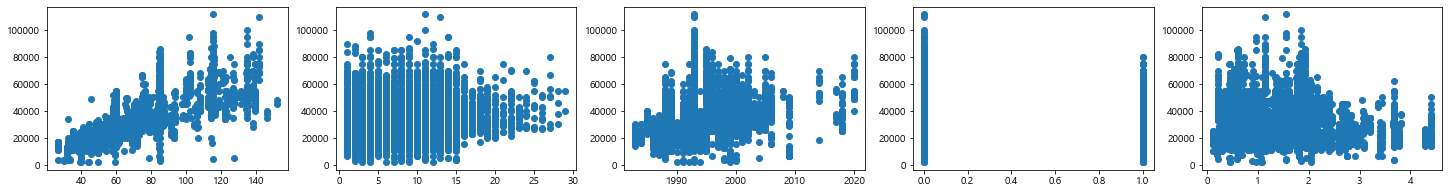

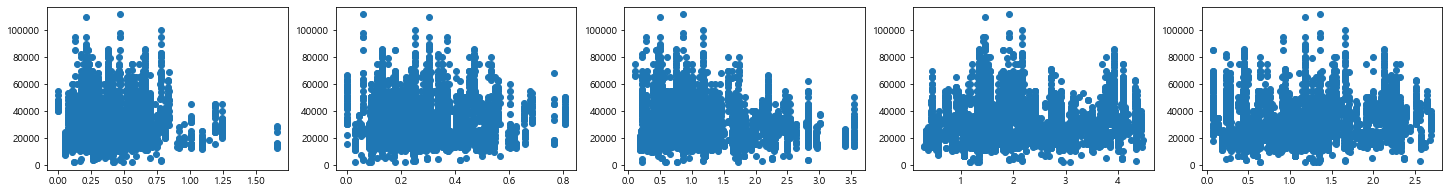

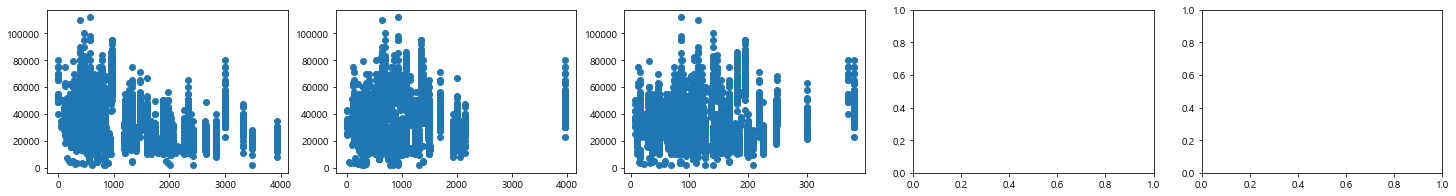

In [44]:
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(junse['전용면적(㎡)'], junse['보증금(만원)'])
    axes[1].scatter(junse['층'], junse['보증금(만원)'])
    axes[2].scatter(junse['건축년도'], junse['보증금(만원)'])
    axes[3].scatter(junse['역세권'], junse['보증금(만원)'])
    axes[4].scatter(junse['병원'], junse['보증금(만원)'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(junse['공원'], junse['보증금(만원)'])
    axes[1].scatter(junse['초등학교'], junse['보증금(만원)'])
    axes[2].scatter(junse['대형마트'], junse['보증금(만원)'])
    axes[3].scatter(junse['백화점'], junse['보증금(만원)'])
    axes[4].scatter(junse['영화관'], junse['보증금(만원)'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(junse['세대수'], junse['보증금(만원)'])
    axes[1].scatter(junse['총주차대수'], junse['보증금(만원)'])
    axes[2].scatter(junse['CCTV대수'], junse['보증금(만원)'])

In [54]:
model_junse_sub.coef_

array([[ 4.56611336e+02,  3.54028673e+01,  1.82492538e+02,
        -4.70788078e+02, -7.33930815e+02,  3.30630005e+02,
        -2.32855584e+03, -1.78577067e+03,  5.36093474e+02,
        -2.14580055e+02, -3.25455587e+00,  1.96867359e+00,
         2.30855129e+01]])

In [73]:
for i in range(len(att)):
    print(att[i], " : ", model_junse_sub.coef_[0][i])

전용면적(㎡)  :  456.6113364380936
층  :  35.40286726294872
건축년도  :  182.49253767238167
역세권  :  -470.7880778447543
병원  :  -733.9308151526914
공원  :  330.6300052389934
초등학교  :  -2328.555839869007
대형마트  :  -1785.770667761973
백화점  :  536.0934740186765
영화관  :  -214.5800554653876
세대수  :  -3.25455586761479
총주차대수  :  1.968673586742915
CCTV대수  :  23.08551294974826


In [77]:
junse['역거리(m)']

0        1042.694537
1        1042.694537
2        1042.694537
3        1042.694537
4        1042.694537
            ...     
11688     879.641693
11690     879.641693
11691     879.641693
11693     879.641693
11694     879.641693
Name: 역거리(m), Length: 8488, dtype: float64

# 역거리와 전월세 가격 간 관계 탐색

<AxesSubplot:xlabel='보증금(만원)'>

D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


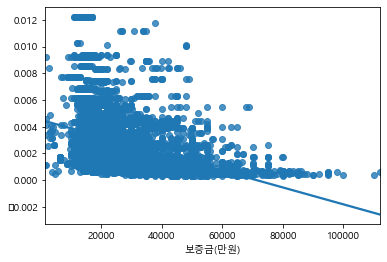

In [97]:
sns.regplot(x='보증금(만원)',y=(round(junse['전용면적(㎡)'].mean()) / junse['전용면적(㎡)'])/junse['역거리(m)'],data=junse, fit_reg=True, ci=None)

In [105]:
junse['전용면적(㎡)'].mean()

63.828931385485674

<AxesSubplot:xlabel='보증금(만원)'>

D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


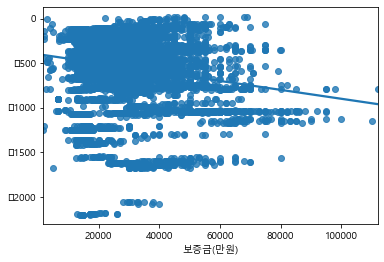

In [106]:
sns.regplot(x='보증금(만원)',y=junse['전용면적(㎡)']-junse['역거리(m)'],data=junse, fit_reg=True, ci=None)

In [110]:
(junse['전용면적(㎡)'].mean() - junse['전용면적(㎡)']) * junse['역거리(m)']

0        1006.606468
1        1006.606468
2        1006.606468
3        1006.606468
4         971.609468
            ...     
11688     831.230625
11690     805.180625
11691     805.180625
11693     831.230625
11694     805.180625
Length: 8488, dtype: float64

<AxesSubplot:xlabel='보증금(만원)'>

D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


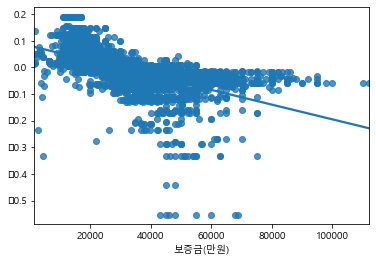

In [116]:
sns.regplot(x='보증금(만원)',y=((junse['전용면적(㎡)'].mean() - junse['전용면적(㎡)'])/junse['역거리(m)']),data=junse, fit_reg=True, ci=None)

<AxesSubplot:xlabel='보증금(만원)'>

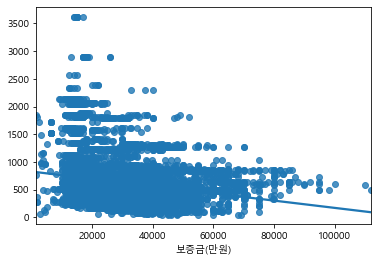

In [120]:
sns.regplot(x='보증금(만원)',y=junse['역거리(m)'] * (round(junse['전용면적(㎡)'].mean()) / junse['전용면적(㎡)']),data=junse, fit_reg=True, ci=None)

<AxesSubplot:xlabel='전용면적(㎡)', ylabel='역거리(m)'>

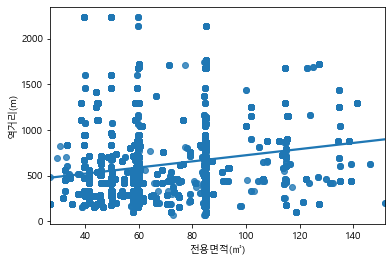

In [5]:
sns.regplot(x='전용면적(㎡)',y='역거리(m)',data=junse, fit_reg=True, ci=None)

In [6]:
#기울기, y절편
f = np.polyfit(junse['전용면적(㎡)'], junse['역거리(m)'], deg=1)
print(f[0], f[1])

3.366100379910475 387.35994260806666


In [7]:
(f[0]*(round(junse['전용면적(㎡)'].mean()) - junse['전용면적(㎡)'])) + junse['역거리(m)']

0        921.794309
1        921.794309
2        921.794309
3        921.794309
4        803.990894
            ...    
11688    717.261011
11690    629.574096
11691    629.574096
11693    717.261011
11694    629.574096
Length: 8488, dtype: float64

In [9]:
tf = pd.DataFrame()
tf['plusMinus'] = round(junse['전용면적(㎡)'].mean() - junse['전용면적(㎡)']) < 0
tf

,plusMinus
0,True
1,True
2,True
3,True
4,True
...,...
11688,True
11690,True
11691,True
11693,True


In [10]:
tf.plusMinus = tf.plusMinus.replace(True, -1)
tf.plusMinus = tf.plusMinus.replace(False, 1)

<AxesSubplot:xlabel='보증금(만원)'>

D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


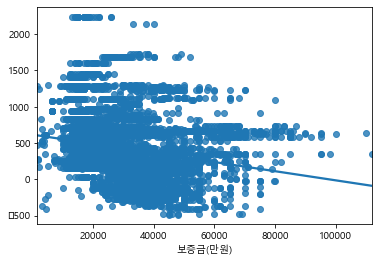

In [11]:
sns.regplot(x='보증금(만원)',y=(f[0]*(abs(round(junse['전용면적(㎡)'].mean() - junse['전용면적(㎡)'])))+f[1]) * tf['plusMinus'] + junse['역거리(m)'],data=junse, fit_reg=True, ci=None)

In [13]:
f[0]*(abs(round(junse['전용면적(㎡)'].mean() - junse['전용면적(㎡)'])))+f[1]

0        508.539556
1        508.539556
2        508.539556
3        508.539556
4        626.353070
            ...    
11688    548.932761
11690    636.451371
11691    636.451371
11693    548.932761
11694    636.451371
Name: 전용면적(㎡), Length: 8488, dtype: float64

In [14]:
(f[0]*(abs(round(junse['전용면적(㎡)'].mean() - junse['전용면적(㎡)'])))+f[1]) * tf['plusMinus']

0       -508.539556
1       -508.539556
2       -508.539556
3       -508.539556
4       -626.353070
            ...    
11688   -548.932761
11690   -636.451371
11691   -636.451371
11693   -548.932761
11694   -636.451371
Length: 8488, dtype: float64

In [15]:
(f[0]*(abs(round(junse['전용면적(㎡)'].mean() - junse['전용면적(㎡)'])))+f[1]) * tf['plusMinus'] + junse['역거리(m)']

0        534.154980
1        534.154980
2        534.154980
3        534.154980
4        416.341467
            ...    
11688    330.708932
11690    243.190323
11691    243.190323
11693    330.708932
11694    243.190323
Length: 8488, dtype: float64

* 면적계수 x: 평균면적-전용면적. 계수가 작을수록 면적이 크고 클수록 면적이 작다
* 역거리와 면적의 기울기와 y절편을 구해 1차방정식을 만든다.
* 면적계수 x의 절대값을 추세선의 1차방정식에 대입해 거리계수 y를 구한다
* 면적계수 x가 음수면 거리계수 y에 -1을, x가 양수면 y에 1을 곱한다.
* 거리계수 y와 원래 역거리를 더한다.

In [18]:
junse_buf = junse[['보증금(만원)', '전용면적(㎡)', '층', '건축년도', '역거리(m)', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]

In [19]:
junse_buf = junse_buf.dropna()
junse_buf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8301 entries, 0 to 11694
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   보증금(만원)  8301 non-null   int64  
 1   전용면적(㎡)  8301 non-null   float64
 2   층        8301 non-null   int64  
 3   건축년도     8301 non-null   int64  
 4   역거리(m)   8301 non-null   float64
 5   병원       8301 non-null   float64
 6   공원       8301 non-null   float64
 7   초등학교     8301 non-null   float64
 8   대형마트     8301 non-null   float64
 9   백화점      8301 non-null   float64
 10  영화관      8301 non-null   float64
 11  세대수      8301 non-null   int64  
 12  총주차대수    8301 non-null   float64
 13  CCTV대수   8301 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 972.8 KB


In [20]:
f = np.polyfit(junse_buf['전용면적(㎡)'], junse_buf['역거리(m)'], deg=1)
print(f[0], f[1])

3.514591502183451 378.13126648202586


In [21]:
tf = pd.DataFrame()
tf['plusMinus'] = round(junse_buf['전용면적(㎡)'].mean() - junse_buf['전용면적(㎡)']) < 0
tf

,plusMinus
0,True
1,True
2,True
3,True
4,True
...,...
11688,True
11690,True
11691,True
11693,True


In [22]:
tf.plusMinus = tf.plusMinus.replace(True, -1)
tf.plusMinus = tf.plusMinus.replace(False, 1)

In [23]:
(f[0]*(abs(round(junse_buf['전용면적(㎡)'].mean() - junse_buf['전용면적(㎡)'])))+f[1]) * tf['plusMinus']

0       -504.656561
1       -504.656561
2       -504.656561
3       -504.656561
4       -627.667263
            ...    
11688   -550.346250
11690   -641.725629
11691   -641.725629
11693   -550.346250
11694   -641.725629
Length: 8301, dtype: float64

In [24]:
((f[0]*(abs(round(junse_buf['전용면적(㎡)'].mean() - junse_buf['전용면적(㎡)'])))+f[1]) * tf['plusMinus']) + junse_buf['역거리(m)']

0        538.037976
1        538.037976
2        538.037976
3        538.037976
4        415.027274
            ...    
11688    329.295443
11690    237.916064
11691    237.916064
11693    329.295443
11694    237.916064
Length: 8301, dtype: float64

In [25]:
junse_buf['역거리계수'] = ((f[0]*(abs(round(junse_buf['전용면적(㎡)'].mean() - junse_buf['전용면적(㎡)'])))+f[1]) * tf['plusMinus']) + junse_buf['역거리(m)']
junse_buf

,보증금(만원),전용면적(㎡),층,건축년도,역거리(m),병원,공원,초등학교,대형마트,백화점,영화관,세대수,총주차대수,CCTV대수,역거리계수
0,50000,99.917,2,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0,538.037976
1,49000,99.917,4,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0,538.037976
2,45000,99.917,8,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0,538.037976
3,50000,99.917,2,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0,538.037976
4,50000,134.914,2,2000,1042.694537,0.555305,0.635911,0.000095,2.19,3.83,2.21,564,986.0,105.0,415.027274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11688,56000,112.240,2,1993,879.641693,0.225040,0.173319,0.338400,0.22,1.99,0.23,498,622.0,108.0,329.295443
11690,70000,138.290,7,1993,879.641693,0.225040,0.173319,0.338400,0.22,1.99,0.23,498,622.0,108.0,237.916064
11691,82000,138.290,11,1993,879.641693,0.225040,0.173319,0.338400,0.22,1.99,0.23,498,622.0,108.0,237.916064
11693,50000,112.240,2,1993,879.641693,0.225040,0.173319,0.338400,0.22,1.99,0.23,498,622.0,108.0,329.295443


<AxesSubplot:xlabel='보증금(만원)', ylabel='역거리계수'>

D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


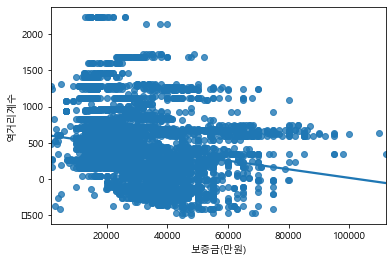

In [27]:
sns.regplot(x='보증금(만원)',y='역거리계수',data=junse_buf, fit_reg=True, ci=None)

In [28]:
np.polyfit(junse_buf['보증금(만원)'], junse_buf['역거리계수'], deg=1)

array([-5.91833773e-03,  6.09600093e+02])

In [29]:
x_junse = junse_buf[['전용면적(㎡)', '층', '건축년도', '역거리계수', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']]
y_junse = junse_buf[['보증금(만원)']]

In [30]:
x_train_j, x_test_j, y_train_j, y_test_j = train_test_split(x_junse, y_junse, train_size=0.8, test_size=0.2)

In [31]:
model_junse_sub_coef = LinearRegression()
model_junse_sub_coef.fit(x_train_j, y_train_j)

LinearRegression()

In [32]:
y_predict_j = model_junse_sub_coef.predict(x_test_j)
y_predict_j

array([[43792.32904379],
       [22662.59695312],
       [47504.92835814],
       ...,
       [40150.10438152],
       [54699.47517451],
       [37851.34759017]])

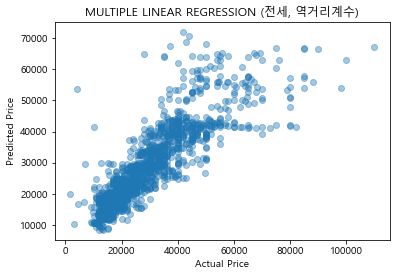

In [33]:
plt.scatter(y_test_j, y_predict_j, alpha=0.4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("MULTIPLE LINEAR REGRESSION (전세, 역거리계수)")
plt.show()

D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\program\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


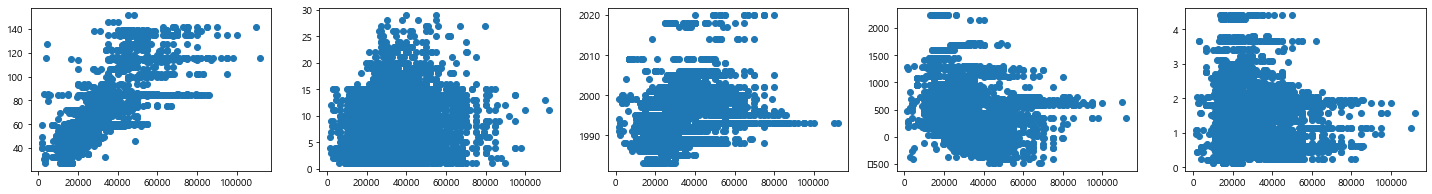

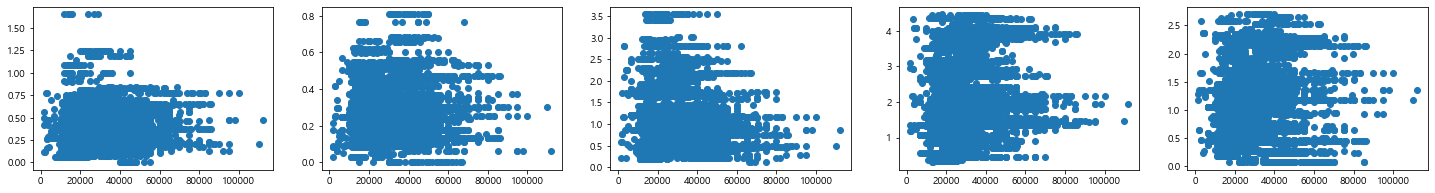

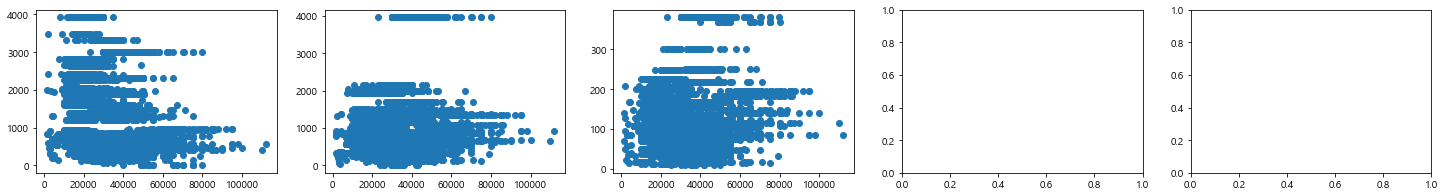

In [34]:
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(junse['보증금(만원)'], junse['전용면적(㎡)'])
    axes[1].scatter(junse['보증금(만원)'], junse['층'])
    axes[2].scatter(junse['보증금(만원)'], junse['건축년도'])
    axes[3].scatter(junse_buf['보증금(만원)'], junse_buf['역거리계수'])
    axes[4].scatter(junse['보증금(만원)'], junse['병원'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(junse['보증금(만원)'], junse['공원'])
    axes[1].scatter(junse['보증금(만원)'], junse['초등학교'])
    axes[2].scatter(junse['보증금(만원)'], junse['대형마트'])
    axes[3].scatter(junse['보증금(만원)'], junse['백화점'])
    axes[4].scatter(junse['보증금(만원)'], junse['영화관'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    axes[0].scatter(junse['보증금(만원)'], junse['세대수'])
    axes[1].scatter(junse['보증금(만원)'], junse['총주차대수'])
    axes[2].scatter(junse['보증금(만원)'], junse['CCTV대수'])

In [35]:
model_junse_sub_coef.coef_

array([[ 4.59204320e+02,  4.49226678e+01,  1.83637577e+02,
         1.04500838e-01, -7.75149389e+02,  1.15673824e+02,
        -2.67335002e+03, -1.86014662e+03,  7.01970012e+02,
        -4.75766255e+02, -3.16846182e+00,  1.95594807e+00,
         2.14523924e+01]])

In [36]:
att = ['전용면적(㎡)', '층', '건축년도', '역거리계수', '병원', '공원', '초등학교', '대형마트', '백화점', '영화관', '세대수', '총주차대수', 'CCTV대수']

In [37]:
for i in range(len(att)):
    print(att[i], " : ", model_junse_sub_coef.coef_[0][i])

전용면적(㎡)  :  459.2043204941036
층  :  44.92266779544353
건축년도  :  183.63757745665035
역거리계수  :  0.10450083775451385
병원  :  -775.1493893502809
공원  :  115.67382434625699
초등학교  :  -2673.350021690249
대형마트  :  -1860.146624636941
백화점  :  701.9700119301569
영화관  :  -475.76625472554815
세대수  :  -3.1684618187586935
총주차대수  :  1.9559480731917795
CCTV대수  :  21.452392436505285


In [38]:
model_junse_sub_coef.score(x_train_j, y_train_j)

0.761766597947894

In [43]:
# 피어슨 상관계수
np.corrcoef(junse_buf['보증금(만원)'], junse_buf['역거리계수'])

array([[ 1.        , -0.20553919],
       [-0.20553919,  1.        ]])

In [44]:
junse_buf['보증금(만원)'].corr(junse_buf['역거리계수'])

-0.20553918590282078

In [45]:
for i in range(len(att)):
    print(att[i], " : ", junse_buf['보증금(만원)'].corr(junse_buf[att[i]]))

전용면적(㎡)  :  0.842640052865722
층  :  0.09239378498384314
건축년도  :  0.4288204462450391
역거리계수  :  -0.20553918590282078
병원  :  -0.09963051709234533
공원  :  0.09497819222851064
초등학교  :  0.06177460295982278
대형마트  :  -0.0768433956498514
백화점  :  0.16597360932077598
영화관  :  0.10767323889519023
세대수  :  -0.3540948242837888
총주차대수  :  0.02606907645926819
CCTV대수  :  0.10842899326159497
